<a href="https://colab.research.google.com/github/veeraprathp/100-days-of-Machine-Learning/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.impute import SimpleImputer



In [2]:
dataset= pd.read_csv("/content/train.csv")

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
dataset.shape

(1460, 81)

In [18]:
target1 = 'SalePrice'
target = pd.DataFrame(dataset[target1]).set_index(dataset.index)

In [64]:
target


Target Variable

       SalePrice
count     1460.0
mean    180921.2
std      79442.5
min      34900.0
25%     129975.0
50%     163000.0
75%     214000.0
max     755000.0


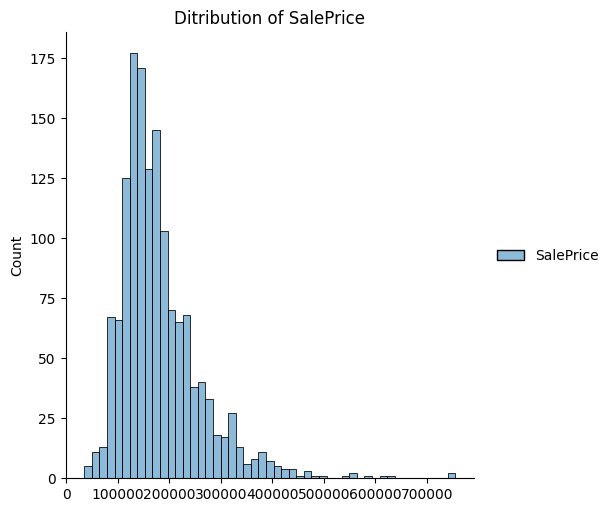

In [20]:
print(target.describe().round(decimals=2))
sns.displot(target)
plt.title("Ditribution of SalePrice")
plt.show()

Numerical Feature

In [21]:
num_feature =dataset.select_dtypes(exclude = ['object']).columns
datase_num = dataset[num_feature].set_index(dataset.index)

Numerical feature - univariate analysis

In [22]:
datase_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
type(num_feature)

pandas.core.indexes.base.Index

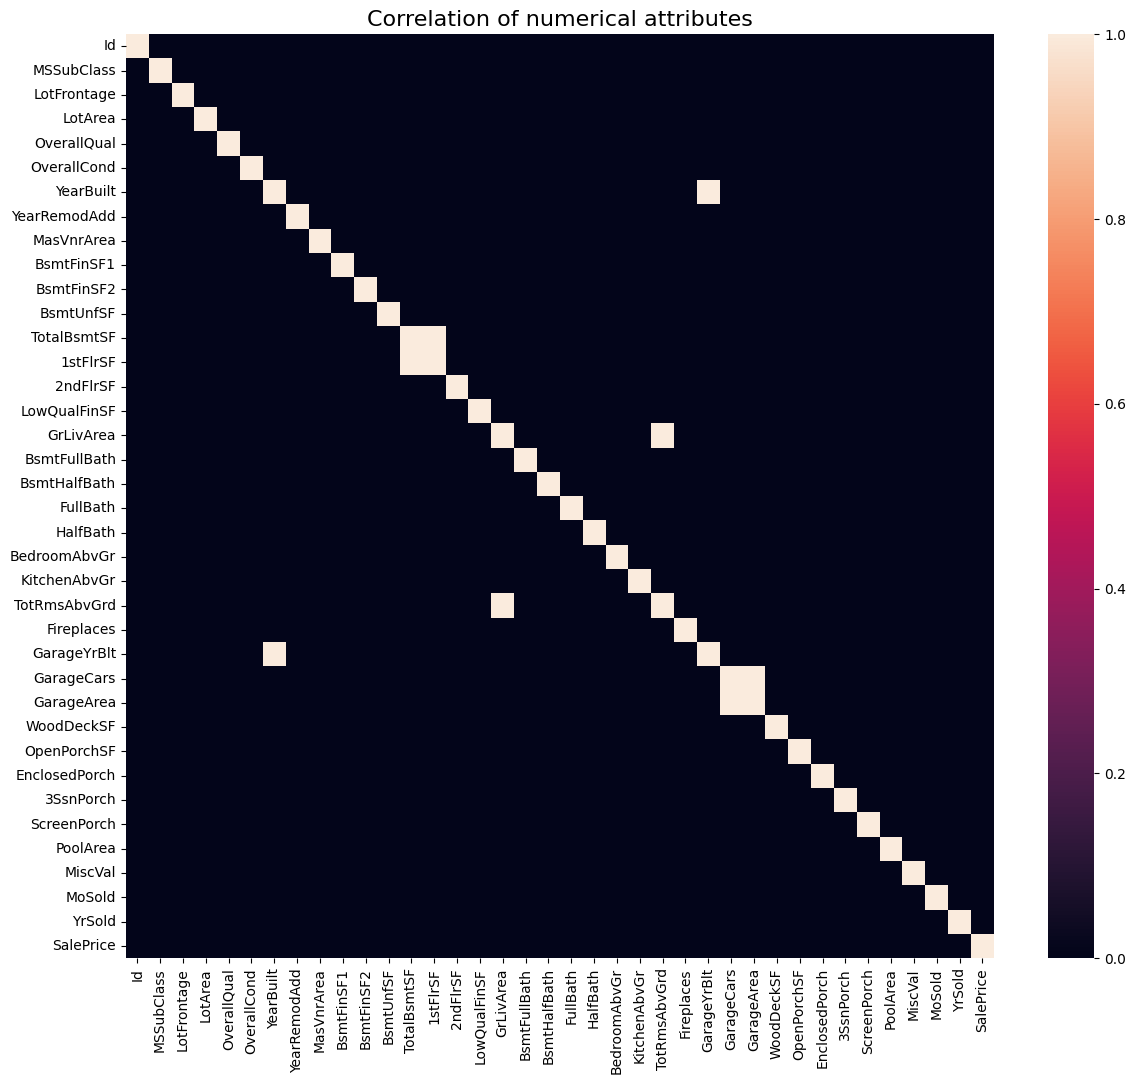

In [24]:
correlation = datase_num.corr()
f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation>0.8)

plt.show()

In [25]:
home_data_num_feature=datase_num.drop(['GarageYrBlt','1stFlrSF','TotRmsAbvGrd','GarageArea'],axis=1)
home_data_num_feature.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
home_data_num_feature=datase_num.drop(['PoolArea','MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold','OverallCond','MSSubClass'],axis=1)

In [27]:
cat_feature = datase_num.select_dtypes(include=['object']).columns
home_data_cat_feature = datase_num[cat_feature]

In [28]:
home_data_num_feature=home_data_num_feature.drop(home_data_num_feature[home_data_num_feature['LotFrontage']>300].index)
print(len(home_data_num_feature))
home_data_num_feature=home_data_num_feature.drop(home_data_num_feature[(home_data_num_feature['GrLivArea']>4000) & (target['SalePrice']<300000)].index)
print(len(home_data_num_feature))

home_data_num_feature=home_data_num_feature.drop(home_data_num_feature[home_data_num_feature['BsmtFinSF1']>4000].index)
print(len(home_data_num_feature))

home_data_num_feature=home_data_num_feature.drop(home_data_num_feature[home_data_num_feature['LotArea']>100000].index)
print(len(home_data_num_feature))

home_data_num_feature=home_data_num_feature.drop(home_data_num_feature[home_data_num_feature['TotalBsmtSF']>6000].index)
print(len(home_data_num_feature))

1458
1457
1457
1453
1453


<ipython-input-28-88b6f32f3166>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  home_data_num_feature=home_data_num_feature.drop(home_data_num_feature[(home_data_num_feature['GrLivArea']>4000) & (target['SalePrice']<300000)].index)


In [29]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
home_data_num_feature = pd.DataFrame(imp.fit_transform(home_data_num_feature),columns=home_data_num_feature.columns,index=home_data_num_feature.index)
home_data_num_feature

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1.0,65.0,8450.0,7.0,2003.0,2003.0,196.0,706.0,150.0,856.0,...,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,208500.0
1,2.0,80.0,9600.0,6.0,1976.0,1976.0,0.0,978.0,284.0,1262.0,...,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,181500.0
2,3.0,68.0,11250.0,7.0,2001.0,2002.0,162.0,486.0,434.0,920.0,...,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,223500.0
3,4.0,60.0,9550.0,7.0,1915.0,1970.0,0.0,216.0,540.0,756.0,...,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,140000.0
4,5.0,84.0,14260.0,8.0,2000.0,2000.0,350.0,655.0,490.0,1145.0,...,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,62.0,7917.0,6.0,1999.0,2000.0,0.0,0.0,953.0,953.0,...,7.0,1.0,1999.0,2.0,460.0,0.0,40.0,0.0,0.0,175000.0
1456,1457.0,85.0,13175.0,6.0,1978.0,1988.0,119.0,790.0,589.0,1542.0,...,7.0,2.0,1978.0,2.0,500.0,349.0,0.0,0.0,0.0,210000.0
1457,1458.0,66.0,9042.0,7.0,1941.0,2006.0,0.0,275.0,877.0,1152.0,...,9.0,2.0,1941.0,1.0,252.0,0.0,60.0,0.0,0.0,266500.0
1458,1459.0,68.0,9717.0,5.0,1950.0,1996.0,0.0,49.0,0.0,1078.0,...,5.0,0.0,1950.0,1.0,240.0,366.0,0.0,112.0,0.0,142125.0


In [47]:
dataset.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [61]:
x= dataset.drop(columns=['SalePrice','Id','Alley','PoolQC','Fence','MiscFeature','OpenPorchSF','MSZoning','EnclosedPorch','3SsnPorch','PoolArea','MiscVal','ScreenPorch','GarageCars','GarageQual','WoodDeckSF'])
y= dataset['SalePrice']

In [95]:
numerical_cols = x.select_dtypes(include=['number']).columns

In [96]:
categorical_cols = x.select_dtypes(include=['object']).columns

In [97]:
categorical_cols

Index(['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [98]:
from sklearn.pipeline import Pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [99]:
from sklearn.preprocessing import  OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [100]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [102]:
X_preprocessed = preprocessor.fit_transform(x)

In [103]:
X_preprocessed

<1460x256 sparse matrix of type '<class 'numpy.float64'>'
	with 94811 stored elements in Compressed Sparse Row format>

In [111]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [112]:
ada = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', AdaBoostRegressor(n_estimators=100, random_state=42))])

In [113]:
ada.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrL...
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor',
                 AdaBoostRegressor(n_estimators=100, random_state=42))])

In [114]:
y_pred = ada.predict(X_test)

In [116]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [117]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1392096934.7490973
R-squared: 0.8185087704034416
